# Python Project - Prosper Loan
## by Ken Obech

## Introduction
> The Prosper Loan dataset contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.
> The main goal is EDA.









## Preliminary Wrangling
> This is a loan data set. The data analysis will involve explaratory data analysis to help understand the data’s structure, oddities, patterns and relationships. The analysis in this case is structured and it ranges from simple univariate relationships to multivariate relationships.


## Import Libraries

In [37]:
# import all packages and libraries required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Load the Dataset

In [38]:
# load in the dataset into a pandas dataframe
df=pd.read_csv('prosperLoanData.csv')

### Basic Data Exploration

In [40]:
# Display information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [41]:
# Display the Descriptive statistics for the numerical values
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [42]:
# Display random rows to get a better understanding of the dataset
df.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


### Structure of the oiginal dataset?

- 113937 rows × 81 columns

### Data Assesment and Cleaning

- change the column names into lower case
- choose a subset of important features
- based on the listing numbers, drop duplicted rows
- convert the datatypes of totaltrades and totalinquiries to int, and, listingcreationdate to datetime
- remove the rows without prosper rating
- fill in the missing values in columns of occupation and debttoincomeratio
- change the data type of listing category to string

### Features of Interest

# Interest
- The main interest is on determining the features that predict the borrower's Annual Percentage Rate (APR) for the loan.
- How employment status and debtToIncome ratio associates with various metrics in the dataset.

# What are the main features of interest in your dataset?
> 'listingnumber','listingcreationdate','loanoriginalamount','loanstatus','listingcategory (numeric)','borrowerstate','borrowerapr','borrowerrate','statedmonthlyincome', 'prosperrating (alpha)', 
        'occupation','term','employmentstatus','totalinquiries','debttoincomeratio','monthlyloanpayment','totaltrades','investors'

# What features in the dataset do you think will help support your investigation into your feature(s) of interest?
- total loan amount
- loan term
- prosper rating
- borrower's stated monthly income
- employment status
- occupation

In [43]:
# change column names into lowercase
df.columns=df.columns.str.lower()

In [44]:
#subset the dataframe and select the features of interest
columns=['listingnumber', 'listingcreationdate', 'loanoriginalamount', 'loanstatus', 'listingcategory (numeric)', 'borrowerstate', 'borrowerapr', 'borrowerrate', 'statedmonthlyincome', 'prosperrating (alpha)', 'occupation', 'term', 'employmentstatus', 'totalinquiries','debttoincomeratio', 'monthlyloanpayment','totaltrades', 'investors']
df=df[columns]

In [45]:
# display information about the subdataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   listingnumber              113937 non-null  int64  
 1   listingcreationdate        113937 non-null  object 
 2   loanoriginalamount         113937 non-null  int64  
 3   loanstatus                 113937 non-null  object 
 4   listingcategory (numeric)  113937 non-null  int64  
 5   borrowerstate              108422 non-null  object 
 6   borrowerapr                113912 non-null  float64
 7   borrowerrate               113937 non-null  float64
 8   statedmonthlyincome        113937 non-null  float64
 9   prosperrating (alpha)      84853 non-null   object 
 10  occupation                 110349 non-null  object 
 11  term                       113937 non-null  int64  
 12  employmentstatus           111682 non-null  object 
 13  totalinquiries             11

In [46]:
# display random rows to get better understanding of the dataset and errors present
df.sample(15)

,listingnumber,listingcreationdate,loanoriginalamount,loanstatus,listingcategory (numeric),borrowerstate,borrowerapr,borrowerrate,statedmonthlyincome,prosperrating (alpha),occupation,term,employmentstatus,totalinquiries,debttoincomeratio,monthlyloanpayment,totaltrades,investors
8715,496676,2011-03-04 10:14:14.177000000,4000,Completed,1,TX,0.29510,0.2599,2083.333333,D,Attorney,36,Self-employed,2.0,NaN,161.14,15.0,67
23489,462592,2010-06-15 09:53:47.870000000,3000,Completed,3,IL,0.07339,0.0700,10416.666667,AA,Engineer - Electrical,36,Employed,7.0,0.04,92.63,14.0,64
85455,25069,2006-07-17 09:07:45.883000000,3000,Completed,0,FL,0.16416,0.1570,20833.333333,NaN,Doctor,36,Not available,4.0,0.17,66.14,NaN,60
12551,326400,2008-05-05 15:21:06.300000000,1000,Completed,4,OH,0.17373,0.1520,2509.500000,NaN,Military Officer,36,Full-time,1.0,0.48,34.76,13.0,39
11303,624244,2012-08-13 17:13:15.247000000,8500,Current,2,IL,0.24682,0.2218,3750.000000,C,Other,60,Employed,7.0,0.23,235.63,17.0,10
10942,115087,2007-03-23 21:29:53.803000000,18950,Completed,0,OR,0.11596,0.1090,5048.333333,NaN,Social Worker,36,Full-time,1.0,0.15,619.50,13.0,307
61585,451214,2010-03-20 12:39:59.380000000,4000,Completed,7,TX,0.11296,0.0920,10000.000000,A,Other,36,Full-time,4.0,0.21,127.57,29.0,142
5330,995808,2013-10-22 09:34:55.443000000,10000,Current,1,MI,0.18197,0.1585,3583.333333,B,Teacher,60,Employed,1.0,0.27,242.38,19.0,1
71238,63379,2006-11-17 18:37:41.257000000,1850,Completed,0,NaN,0.12386,0.1144,2166.666667,NaN,Tradesman - Electrician,36,Not available,3.0,0.45,60.95,NaN,57
49749,516277,2011-07-13 19:28:24.720000000,5000,Current,1,HI,0.30532,0.2699,7500.000000,D,Food Service,36,Self-employed,4.0,NaN,204.10,33.0,7


In [47]:
# drop duplicates in the dataset
df=df.drop_duplicates()

In [48]:
# select rows only where prosperrating is not null
df=df[df['prosperrating (alpha)'].notnull()]

In [49]:
# fill the missing values for occupation as unknown
df.occupation=df.occupation.fillna('unknown')

In [50]:
# fill in the missing values of debt to income ratio with the mean of the same column
df['debttoincomeratio']=df['debttoincomeratio'].fillna(df['debttoincomeratio'].mean())

In [51]:
# convert the datatypes of the necessary columns
df.totalinquiries=df.totalinquiries.astype(int)
df.totaltrades=df.totaltrades.astype(int)

In [52]:
# split the listingcreationdate column into year,month and day and time
df['year']=df['listingcreationdate'].apply(lambda x: x.split("-")[0]).astype(str)
df['month'] = df['listingcreationdate'].apply(lambda x: x.split("-")[1]).astype(str)

In [53]:
# Ensure each month has unique value
df.month.unique()

array(['02', '10', '09', '12', '04', '05', '07', '08', '11', '01', '06',
       '03'], dtype=object)

In [54]:
# name the months
df.month.replace(['01','02','03','04','05','06','07','08','09','10','11','12'],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], inplace=True)

In [55]:
# Check the unique values of month
df.month.unique()

array(['Feb', 'Oct', 'Sep', 'Dec', 'Apr', 'May', 'Jul', 'Aug', 'Nov',
       'Jan', 'Jun', 'Mar'], dtype=object)

In [56]:
df['listingcreationdate'] = df['listingcreationdate'].apply(lambda x: x.split("-")[2]).astype(str)

In [57]:
df['day'] = df['listingcreationdate'].apply(lambda x: x.split(" ")[0]).astype(str)
df['time'] = df['listingcreationdate'].apply(lambda x: x.split(" ")[1]).astype(str)

In [58]:
# Delete the original listingcreationdate column
del df['listingcreationdate']

## Exploratory Data Analysis

In [61]:
# display information about the cleaned dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83982 entries, 1 to 113936
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   listingnumber              83982 non-null  int64  
 1   loanoriginalamount         83982 non-null  int64  
 2   loanstatus                 83982 non-null  object 
 3   listingcategory (numeric)  83982 non-null  int64  
 4   borrowerstate              83982 non-null  object 
 5   borrowerapr                83982 non-null  float64
 6   borrowerrate               83982 non-null  float64
 7   statedmonthlyincome        83982 non-null  float64
 8   prosperrating (alpha)      83982 non-null  object 
 9   occupation                 83982 non-null  object 
 10  term                       83982 non-null  int64  
 11  employmentstatus           83982 non-null  object 
 12  totalinquiries             83982 non-null  int32  
 13  debttoincomeratio          83982 non-null  fl

In [62]:
# show the descriptive statistics for numericals
df.describe()

,listingnumber,loanoriginalamount,listingcategory (numeric),borrowerapr,borrowerrate,statedmonthlyincome,term,totalinquiries,debttoincomeratio,monthlyloanpayment,totaltrades,investors
count,8.398200e+04,83982.000000,83982.000000,83982.000000,83982.00000,8.398200e+04,83982.000000,83982.000000,83982.000000,83982.00000,83982.000000,83982.000000
mean,7.712395e+05,9061.224381,3.321771,0.226945,0.19630,5.930614e+03,42.462813,4.285514,0.258692,291.40139,23.925115,68.677788
std,2.359100e+05,6279.649648,4.368851,0.080047,0.07475,8.268432e+03,11.639032,3.828780,0.305687,186.47539,11.610432,95.318077
min,4.162750e+05,1000.000000,0.000000,0.045830,0.04000,0.000000e+00,12.000000,0.000000,0.000000,0.00000,1.000000,1.000000
25%,5.570608e+05,4000.000000,1.000000,0.163610,0.13590,3.426938e+03,36.000000,2.000000,0.160000,157.11250,15.000000,1.000000
50%,7.341785e+05,7500.000000,1.000000,0.219450,0.18750,5.000000e+03,36.000000,3.000000,0.240000,251.28000,23.000000,32.000000
75%,9.756778e+05,13500.000000,3.000000,0.292540,0.25740,7.083333e+03,60.000000,6.000000,0.310000,387.62000,31.000000,98.000000
max,1.255725e+06,35000.000000,20.000000,0.423950,0.36000,1.750003e+06,60.000000,78.000000,10.010000,2251.51000,122.000000,1189.000000


## Univariate Exploration



I will start by looking at the distribution of how the loans are listed per year, month and day.

### Distribution of Loan Listing

In [63]:
# order the months
rate_order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = rate_order)
df['month']=df['month'].astype(ordered_var)

In [64]:
# group the months according to the listing number
df.groupby('month')['listingnumber'].count()

month
Jan    9036
Feb    7887
Mar    5376
Apr    4906
May    5469
Jun    5805
Jul    6630
Aug    6401
Sep    7480
Oct    8586
Nov    8122
Dec    8284
Name: listingnumber, dtype: int64

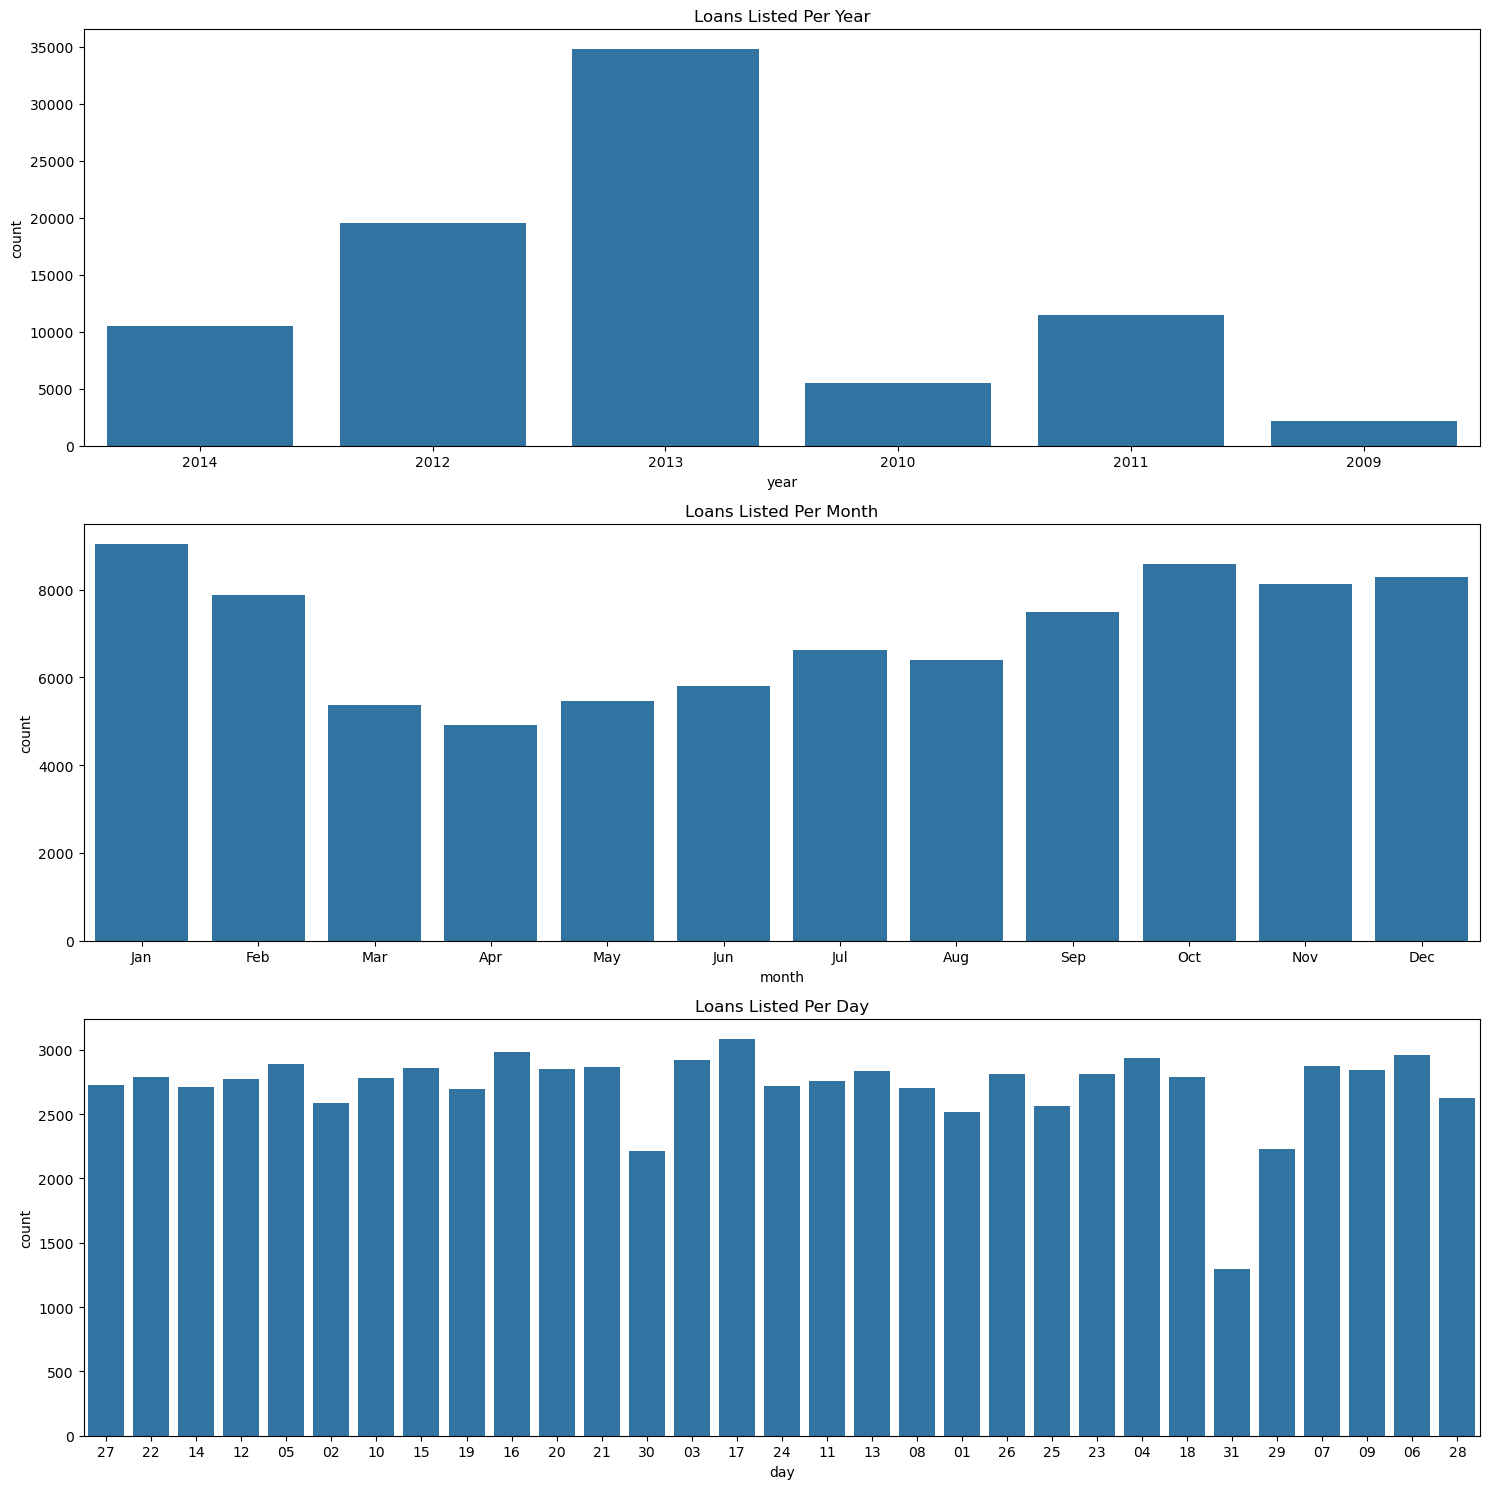

In [153]:
# countplots of loans listed per year
fig, ax = plt.subplots(nrows=3, figsize = [15,15])
default_color = sns.color_palette()[0]
sns.countplot(data = df, x = 'year', color = default_color, ax = ax[0])
ax[0].set_title('Loans Listed Per Year')
sns.countplot(data = df, x = 'month', color = default_color, ax = ax[1])
ax[1].set_title('Loans Listed Per Month')
sns.countplot(data = df, x = 'day', color = default_color, ax = ax[2])
ax[2].set_title('Loans Listed Per Day')
plt.tight_layout();


From the graphs above, the following observations were made:
- 2013 had the higher number of loans listed per year while 2009 had the lowest.
- January had the highest number of loans listed per month while April had the lowest.
- Day 17 had the highest number of loans listed per day.

#### Distribution of Borrower APR

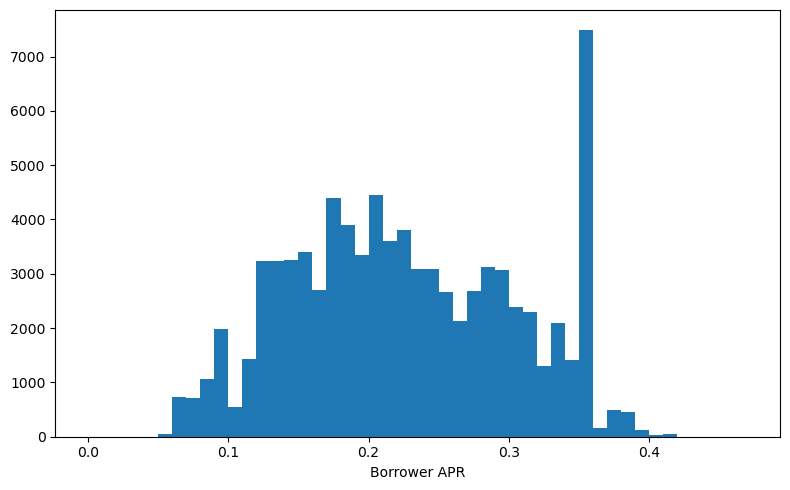

In [154]:
# distribution of borrowerApr
bins = np.arange(0, df.borrowerapr.max()+0.05, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data=df, x = 'borrowerapr', bins = bins);
plt.xlabel('Borrower APR')
plt.tight_layout();

The distribution of Borrower APR is multimodal with the highest peak being at 0.36. There are also peaks at 0.1 and 0.2.

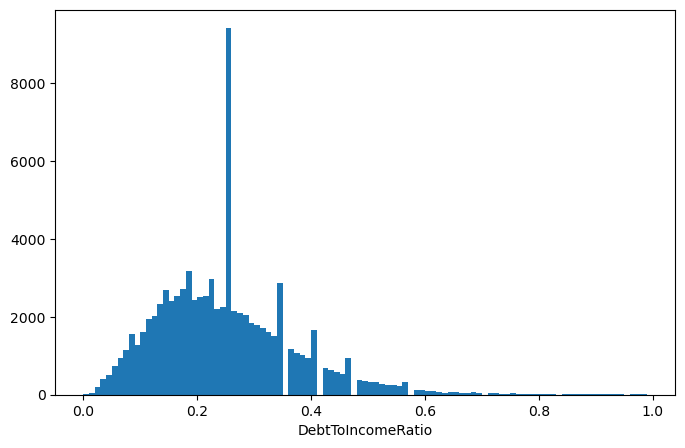

In [91]:
# distribution of DebtToIncomeRatio 
bins = np.arange(0,1, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'debttoincomeratio', bins = bins);
plt.xlabel('DebtToIncomeRatio');

The highest debt to income ratio is at around 0.25. This shows that most people prefer a debt to income ratio of 1:4.

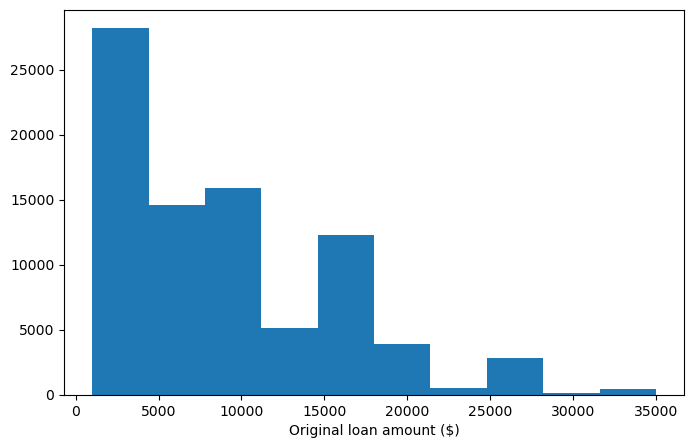

In [155]:
# distribution of loan original amount
plt.figure(figsize=[8, 5])
plt.hist(df['loanoriginalamount']);
plt.xlabel('Original loan amount ($)')
plt.tight_layout;

Most people prefer loans between 1000-20000.

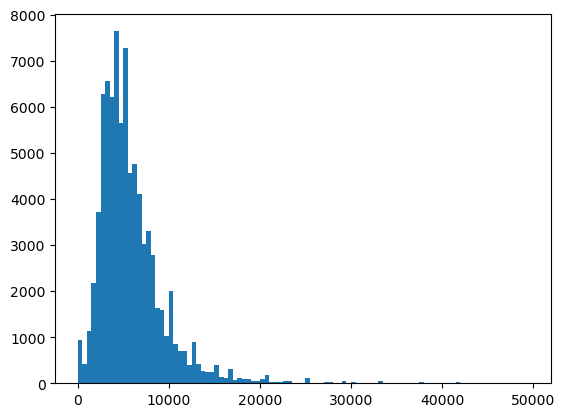

In [157]:
# Distribution of stated monthly income
bins_smi = np.arange(0, 50000, 500)
plt.hist(data = df, x = 'statedmonthlyincome', bins=bins_smi);

Most people have a monthly income of around 6k.

### The distribution of occupation, prosper rating and employment status

In [95]:
# Convert ProsperRating and Employment status into ordered categorical types
rate_order = ['HR','E','D','C','B','A','AA']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = rate_order)
df['prosperrating (alpha)'] = df['prosperrating (alpha)'].astype(ordered_var)

emp_order = ['Employed','Self-employed','Full-time','Part-time','Retired','Other','Not employed', 'Not available']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = emp_order)
df['employmentstatus'] = df['employmentstatus'].astype(ordered_var)

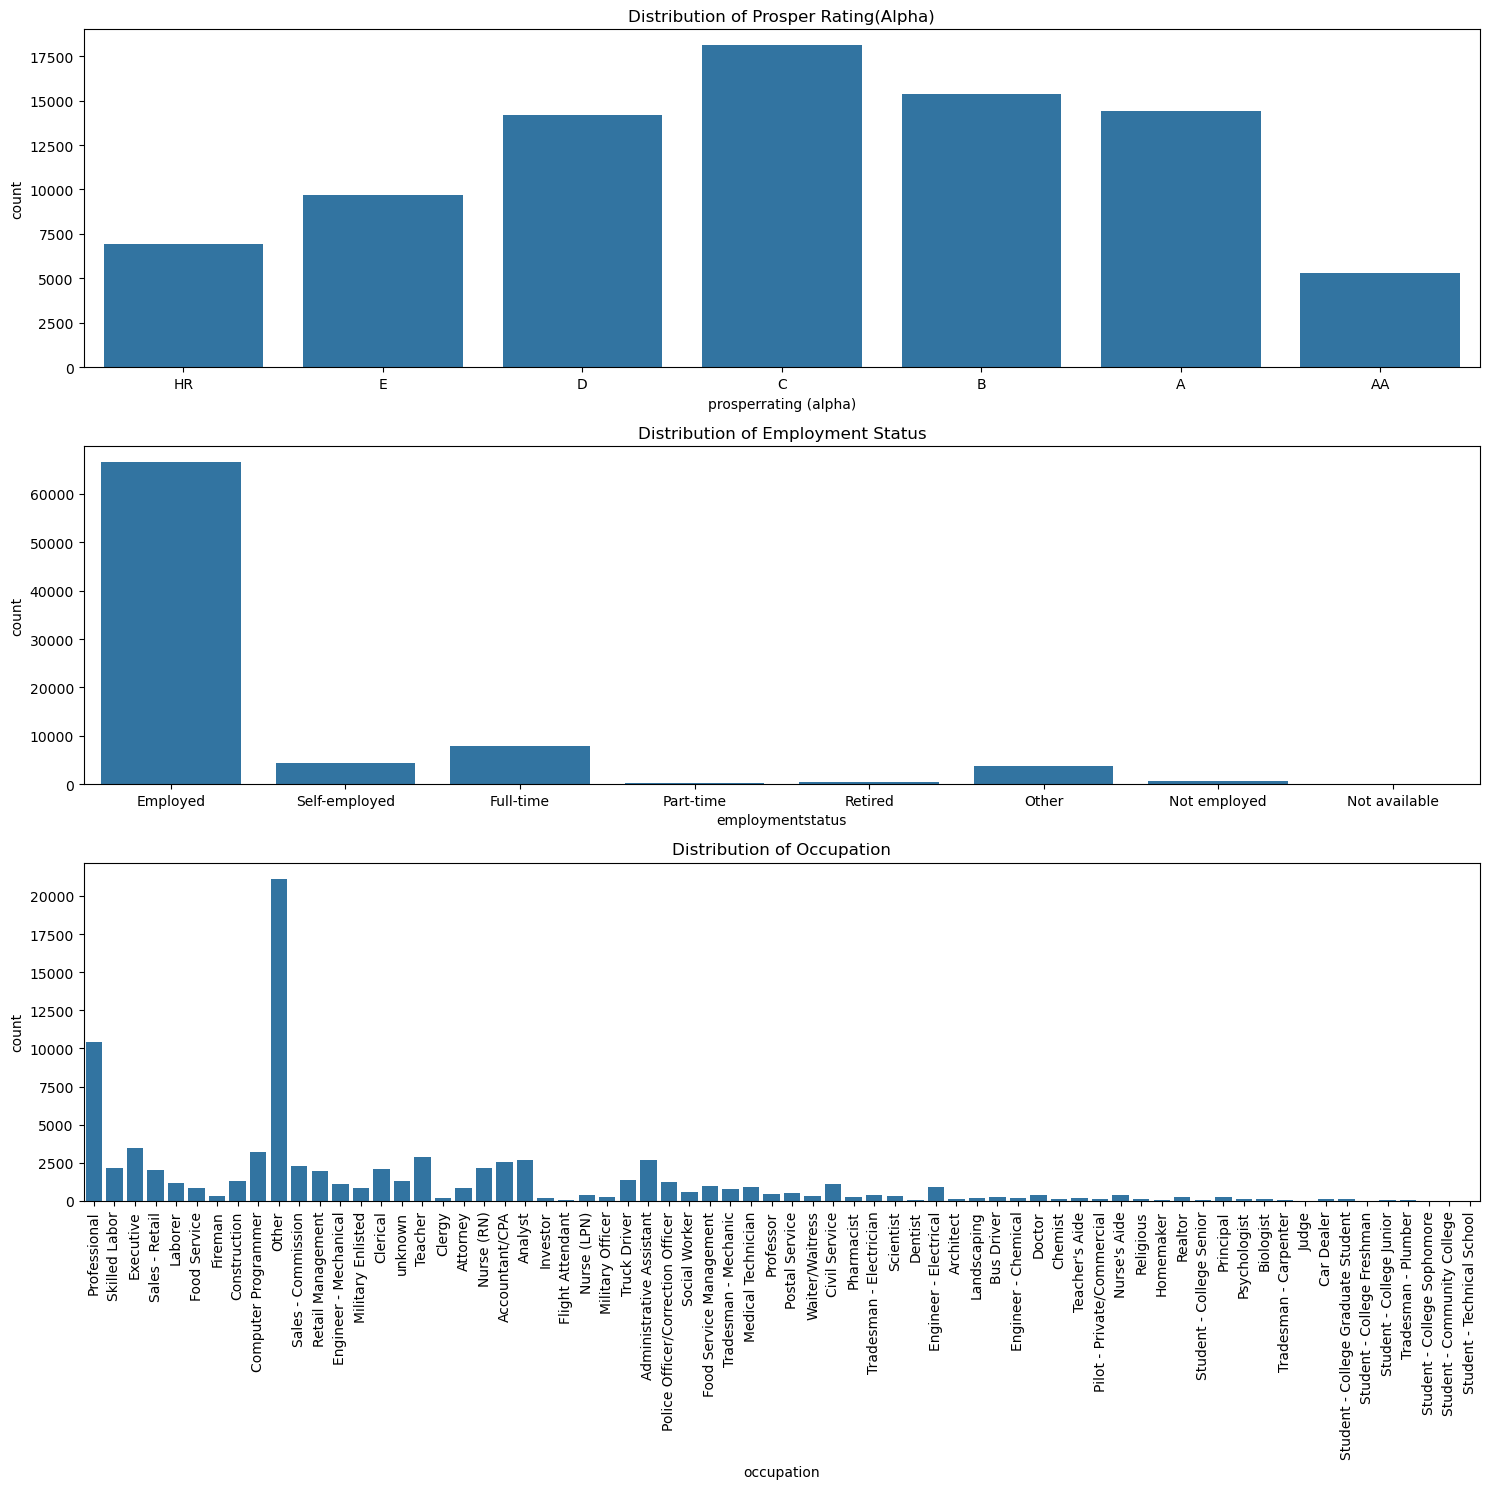

In [158]:
fig, ax = plt.subplots(nrows=3, figsize = [15,15])
default_color = sns.color_palette()[0]
sns.countplot(data = df, x = 'prosperrating (alpha)', color = default_color, ax = ax[0])
ax[0].set_title('Distribution of Prosper Rating(Alpha)')
sns.countplot(data = df, x = 'employmentstatus', color = default_color, ax = ax[1])
ax[1].set_title('Distribution of Employment Status')
sns.countplot(data = df, x = 'occupation', color = default_color, ax = ax[2])
ax[2].set_title('Distribution of Occupation')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show();

From the graphs above, the people who take loans frequently are either employed or work full time. Students take the least loans. finally, the ratings of the most borrowers are from D to A.

## Bivariate Exploration

In [113]:
num_vars = ['loanoriginalamount', 'borrowerapr', 'statedmonthlyincome','debttoincomeratio']
cat_vars = ['term','prosperrating (alpha)', 'employmentstatus','occupation']

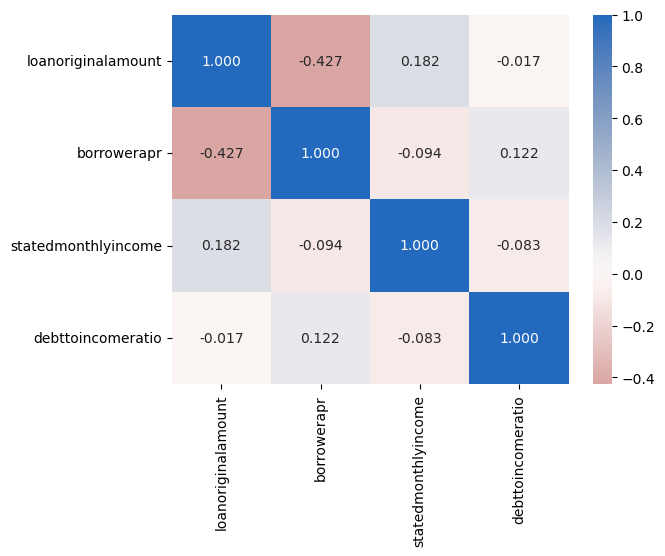

In [115]:
# correlation
sns.heatmap(df[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);

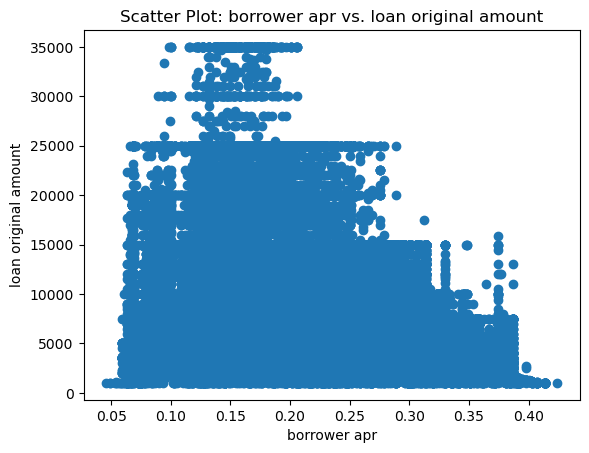

In [116]:
#scatter plot
plt.scatter(df['borrowerapr'], df['loanoriginalamount'])
plt.xlabel('borrower apr')
plt.ylabel('loan original amount')
plt.title('Scatter Plot: borrower apr vs. loan original amount')
plt.show();

The scatter plot shows that the borrower apr and loan original amount are negatively correlated.

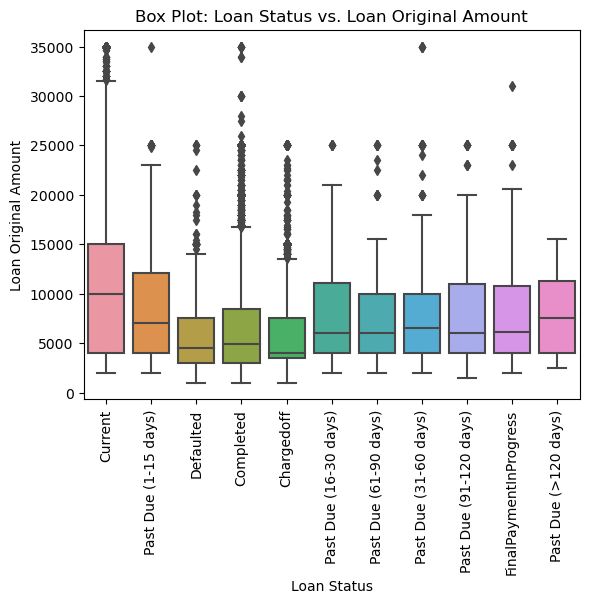

In [117]:
#boxplot
sns.boxplot(x='loanstatus', y='loanoriginalamount', data=df)
plt.xlabel('Loan Status')
plt.ylabel('Loan Original Amount')
plt.title('Box Plot: Loan Status vs. Loan Original Amount')
plt.xticks(rotation=90)
plt.show();

Most of the loans are comleted.

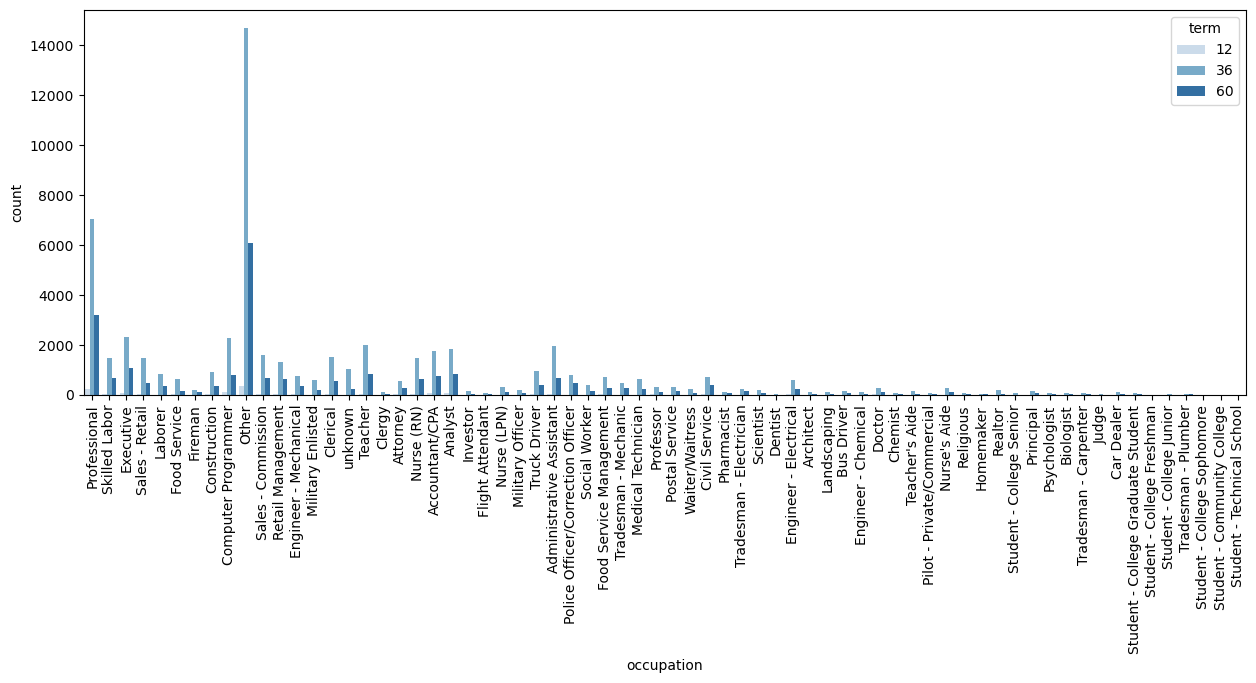

In [121]:
# plot of Occupation vs term
plt.figure(figsize = [15,5])
sns.countplot(data = df, x = 'occupation', hue = 'term', palette = 'Blues');
plt.xticks(rotation=90);

People who work under the cattegory 'other', take the highest number of loans with the highest terms.

### Multivariate Visualisations

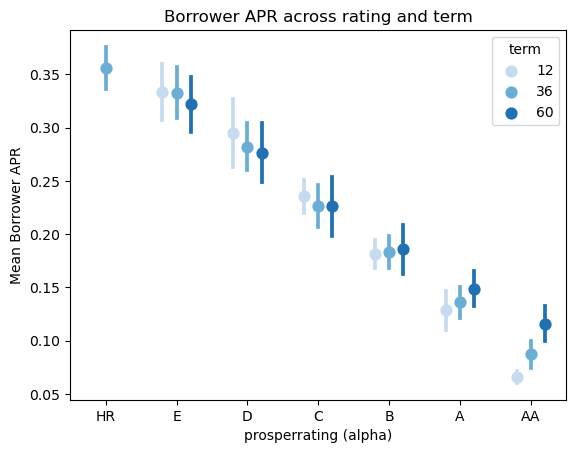

In [159]:
ax = sns.pointplot(data = df, x = 'prosperrating (alpha)', y = 'borrowerapr', hue = 'term',
           palette = 'Blues', linestyles = '', dodge = 0.4, errorbar='sd')
plt.title('Borrower APR across rating and term')
plt.ylabel('Mean Borrower APR')
ax.set_yticklabels([],minor = True);

The borrower APR decrease with the increase of borrow term for people with HR-C raings. But for people with B-AA ratings, the APR increase with the increase of borrow term

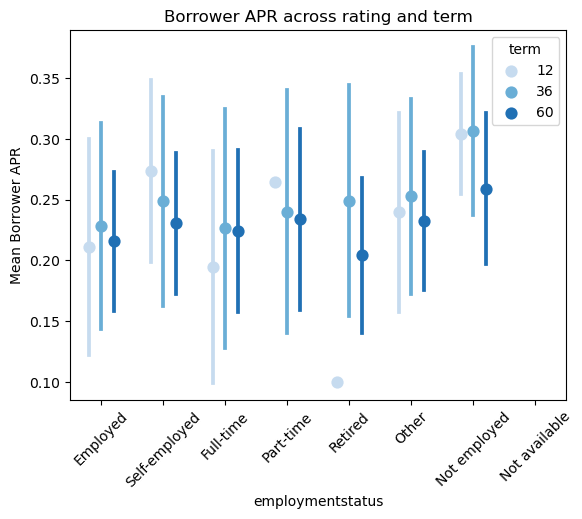

In [160]:
ax = sns.pointplot(data = df, x = 'employmentstatus', y = 'borrowerapr', hue = 'term',
           palette = 'Blues', linestyles = '', dodge = 0.4, errorbar='sd')
plt.title('Borrower APR across rating and term')
plt.ylabel('Mean Borrower APR')
ax.set_yticklabels([],minor = True);
plt.xticks(rotation = 45);

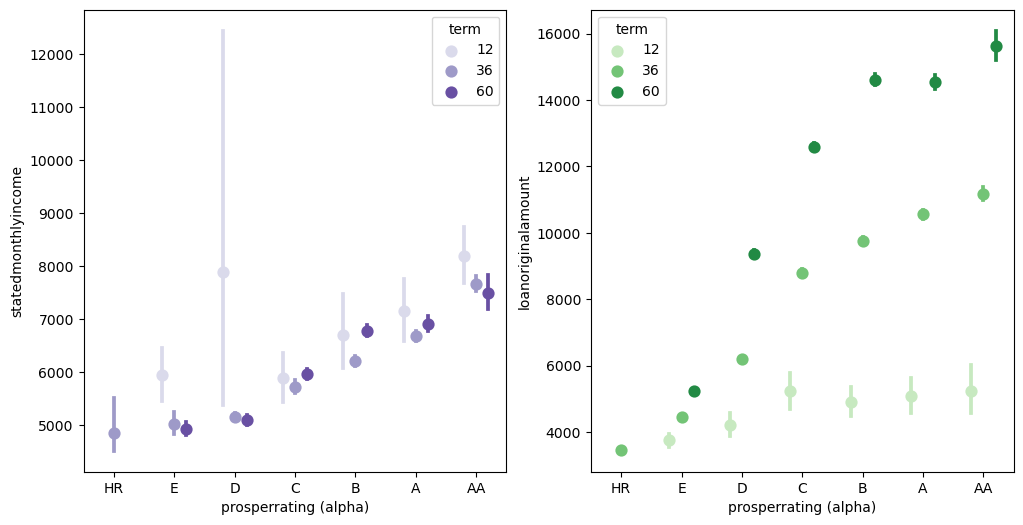

In [126]:
fig, ax = plt.subplots(ncols=2, figsize=[12,6])
sns.pointplot(data = df, x = 'prosperrating (alpha)', y = 'statedmonthlyincome', hue = 'term',
           palette = 'Purples', linestyles = '', dodge = 0.4, ax=ax[0])
sns.pointplot(data = df, x = 'prosperrating (alpha)', y = 'loanoriginalamount', hue = 'term',
           palette = 'Greens', linestyles = '', dodge = 0.4, ax=ax[1]);

## Conclusions


2013 had the higher number of loans listed per year while 2009 had the lowest.January had the highest number of loans listed per month while April had the lowest.Day 17 had the highest number of loans listed per day.
The distribution of Borrower APR is multimodal with the highest peak being at 0.36. There are also peaks at 0.1 and 0.2.
Most people have a monthly income of around 6k whereby they are either employed or work full time. Students take the least loans. The ratings of the most borrowers are from D to A.People who work under the cattegory 'other', take the highest number of loans with the highest terms.The borrower APR decrease with the increase of borrow term for people with HR-C raings. But for people with B-AA ratings, the APR increase with the increase of borrow term.

In [161]:
# save the cleaned dataset for explanatory data analysis
df.to_csv('Prosper Loan Project Cleaned')